In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [2]:
## NVIDIA DATA - (3 year data)
nvidia = yf.Ticker('NVDA')
nvidia_historical = nvidia.history(start='2020-6-21', end='2023-6-20', interval='1d')
nvidia_df = nvidia_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
nvidia_df.rename(columns= {'Close':'NVIDIA'}, inplace=True)

## TESLA DATA
tesla = yf.Ticker('TSLA')
tesla_historical = tesla.history(start='2020-6-21', end='2023-6-20', interval='1d')
tesla_df = tesla_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
tesla_df.rename(columns= {'Close':'TESLA'}, inplace=True)

## META DATA
meta = yf.Ticker('META')
meta_historical = meta.history(start='2020-6-21', end='2023-6-20', interval='1d')
meta_df = meta_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
meta_df.rename(columns= {'Close':'META'}, inplace=True)

## GOOGLE DATA
google = yf.Ticker('GOOGL')
google_historical = google.history(start='2020-6-21', end='2023-6-20', interval='1d')
google_df = google_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
google_df.rename(columns= {'Close':'GOOGLE'}, inplace=True)

## MICROSOFT DATA
microsoft = yf.Ticker('MSFT')
microsoft_historical = microsoft.history(start='2020-6-21', end='2023-6-20', interval='1d')
microsoft_df = microsoft_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
microsoft_df.rename(columns= {'Close':'MICROSOFT'}, inplace=True)

## STARBUCKS DATA
starbucks = yf.Ticker('SBUX')
starbucks_historical = starbucks.history(start='2020-6-21', end='2023-6-20', interval='1d')
starbucks_df = starbucks_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
starbucks_df.rename(columns= {'Close':'STARBUCKS'}, inplace=True)

In [3]:
## Calculate Daily Returns for individual tickers
nvidia_daily = nvidia_df.pct_change()
tesla_daily = tesla_df.pct_change()
meta_daily = meta_df.pct_change()
google_daily = google_df.pct_change()
microsoft_daily = microsoft_df.pct_change()
starbucks_daily = starbucks_df.pct_change()
## CONCAT into one portfolio with all the daily returns
portfolio_df = pd.concat([nvidia_daily, tesla_daily, meta_daily, google_daily,
                          microsoft_daily, starbucks_daily], axis='columns', join='inner')
daily_portfolio = portfolio_df

In [4]:
daily_portfolio.head()

,NVIDIA,TESLA,META,GOOGLE,MICROSOFT,STARBUCKS
Date,,,,,,
2020-06-22 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-23 00:00:00-04:00,-0.008056,0.007503,0.012624,0.009182,0.006681,0.001194
2020-06-24 00:00:00-04:00,-0.022698,-0.040857,-0.033933,-0.021366,-0.020158,-0.024507
2020-06-25 00:00:00-04:00,0.027556,0.026154,0.007093,0.005863,0.012637,0.002852
2020-06-26 00:00:00-04:00,-0.035300,-0.026613,-0.083164,-0.054514,-0.020016,-0.030874


In [5]:
daily_portfolio.tail()

,NVIDIA,TESLA,META,GOOGLE,MICROSOFT,STARBUCKS
Date,,,,,,
2023-06-12 00:00:00-04:00,0.018365,0.022218,0.023023,0.011536,0.015484,0.005104
2023-06-13 00:00:00-04:00,0.039005,0.035544,0.000996,0.001537,0.007353,0.008125
2023-06-14 00:00:00-04:00,0.048145,-0.007421,0.007482,-0.001292,0.009124,0.014104
2023-06-15 00:00:00-04:00,-0.008001,-0.003466,0.031022,0.011482,0.031897,0.007153
2023-06-16 00:00:00-04:00,0.000914,0.018132,-0.002945,-0.012471,-0.016576,0.004833


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

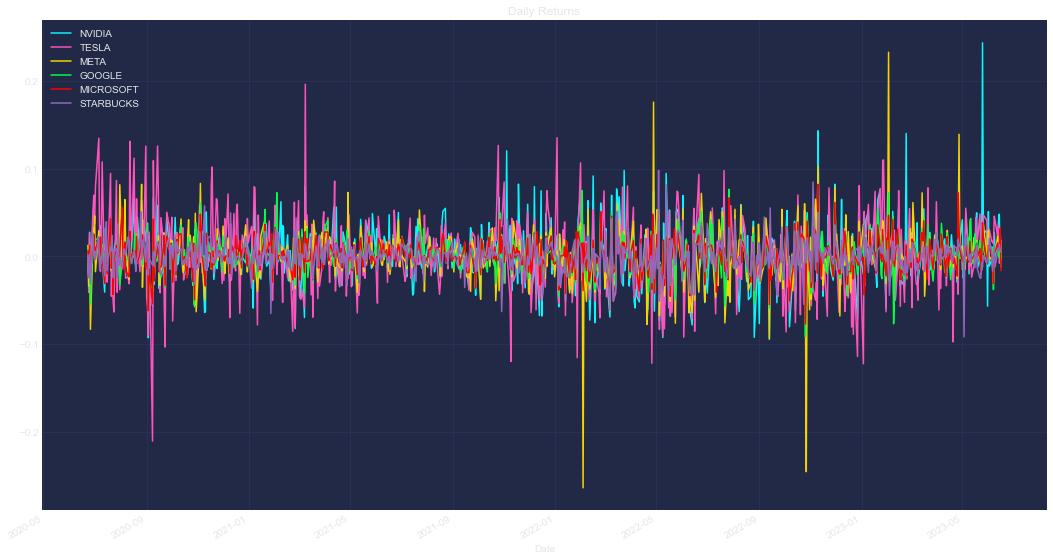

In [6]:
style.use('cyberpunk')
daily_portfolio.plot(figsize=(18, 10), title='Daily Returns')

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

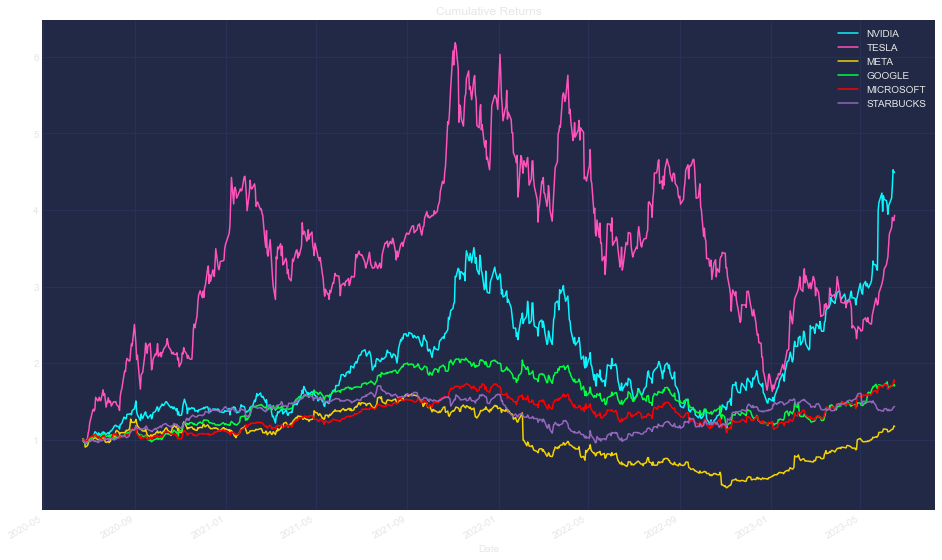

In [7]:
cumulative_returns = (1 + daily_portfolio).cumprod()
cumulative_returns.plot(figsize=(16, 10), title='Cumulative Returns')

In [8]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_portfolio.std()

NVIDIA       0.033869
TESLA        0.040791
META         0.030579
GOOGLE       0.020136
MICROSOFT    0.018434
STARBUCKS    0.017777
dtype: float64

In [9]:
# Calculate the annualized standard deviation (252 trading days)
daily_portfolio.std() * np.sqrt(252)

NVIDIA       0.537649
TESLA        0.647530
META         0.485426
GOOGLE       0.319646
MICROSOFT    0.292631
STARBUCKS    0.282199
dtype: float64

In [10]:
# Construct a correlation table
corr_df = daily_portfolio.corr()
corr_df.style.background_gradient(cmap='summer')

,NVIDIA,TESLA,META,GOOGLE,MICROSOFT,STARBUCKS
NVIDIA,1.000000,0.532280,0.512679,0.609119,0.694115,0.444565
TESLA,0.532280,1.000000,0.340048,0.411906,0.462990,0.338358
META,0.512679,0.340048,1.000000,0.650466,0.591331,0.407232
GOOGLE,0.609119,0.411906,0.650466,1.000000,0.769723,0.474976
MICROSOFT,0.694115,0.462990,0.591331,0.769723,1.000000,0.479183
STARBUCKS,0.444565,0.338358,0.407232,0.474976,0.479183,1.000000


<Axes: title={'center': 'Exponentially Weighted Average'}, xlabel='Date'>

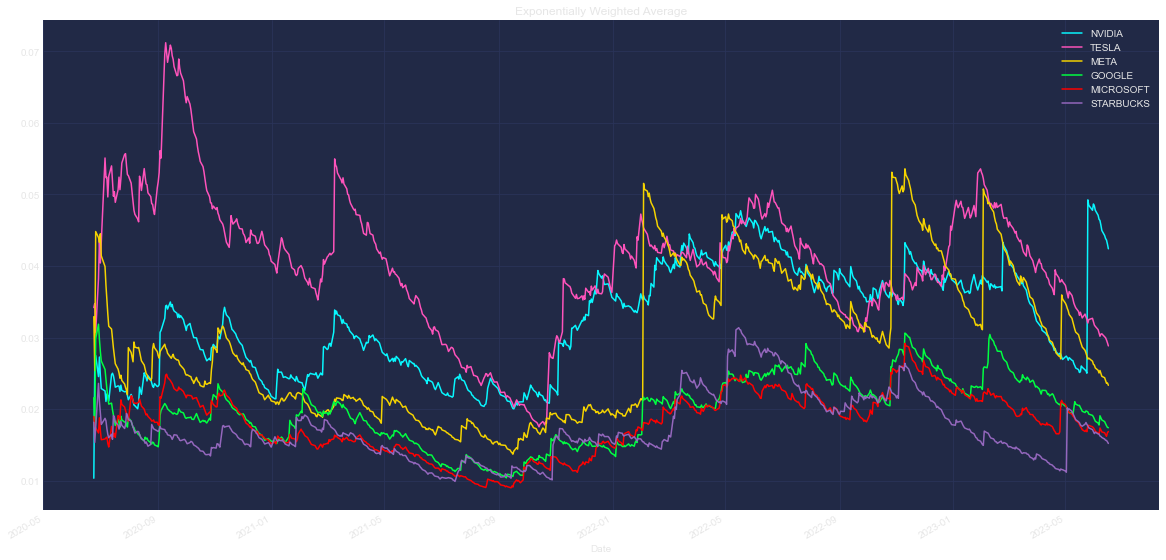

In [11]:
# Calculate a rolling window using the Exponentially Weighted Moving Average. 
daily_portfolio.ewm(halflife=21).std().plot(figsize=(20, 10), title='Exponentially Weighted Average')